In [1]:
import numpy as np
import sys
from iSDRmodule import iSDR
import scipy.io as sp
import seaborn as sns
import matplotlib.pyplot as plt 
sns.set()

In [2]:
Data = sp.loadmat('../examples/S1_p1_MEGT800.mat')
n_c = Data['n_c'][0][0] # size of sensor space
n_s = Data['n_s'][0][0] # size of source space
n_t = Data['n_t'][0][0] # nbr of time samples of MEG data
m_p = Data['m_p'][0][0] # MVAR order = 1
n_t_s = n_t + m_p - 1   # nbr of time samples to be reconstructed
G = Data['G'] # gain matrix
SC = Data['SC'] # structural connectivity 
M = Data['M']  # MEG data
samples = Data['time'][0] # time stimulus locked
delta_t = samples[1] - samples[0]
A = np.eye(n_s) # initialization of MVAR models
reg_parameter = 30 # alpha_ratio (%) of alpha max i.e. (empty active set)
clt = iSDR(reg_parameter, 1e-7, 1e4, 100, True, True)
clt.fit(G, M, A, SC)

In [3]:
print("Execution time {} sec".format(clt.time_execution))

Execution time 87.7583339214 sec


In [4]:
A.shape

(562, 562)

In [5]:
SC.shape

(562, 562)

In [6]:
M.shape

(306, 220)

# Reconstructed regions' activation

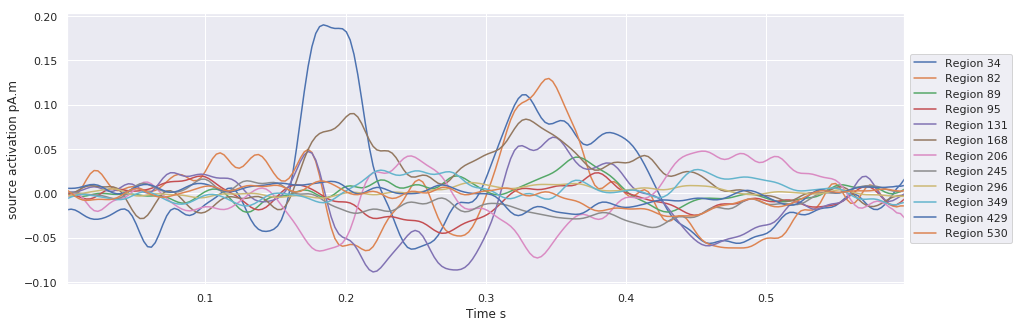

In [7]:
plt.figure(figsize=(15,5))
for i in range(clt.J.shape[1]):
    plt.plot(samples, clt.J[:, i]/1e-12, label='Region ' + str(clt.Active_set[i]));
plt.ylabel('source activation pA.m');
plt.xlabel('Time s');
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.xlim(samples[0], samples[-1]);

# Multivariate autoregressive model weights

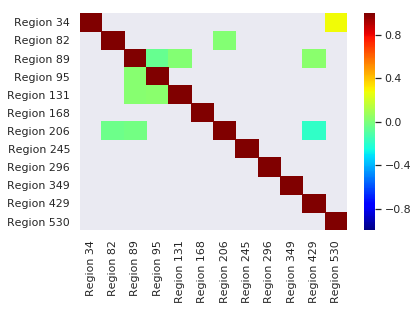

In [20]:
mask = np.abs(clt.MAR) < 0.01
reg_name_y = ['Region ' + str(clt.Active_set[i]) for i in range(len(clt.Active_set))]
reg_name_x = ['Region ' + str(clt.Active_set[i]) for i in range(len(clt.Active_set))]
sns.heatmap(clt.MAR, yticklabels= reg_name_y, xticklabels=reg_name_x, mask=mask, cmap='jet',
            vmin=-1, vmax=1);

# MVAR order 2

In [6]:
Data = sp.loadmat('../examples/S1_p1_MEGT800.mat')
n_c = Data['n_c'][0][0] # size of sensor space
n_s = Data['n_s'][0][0] # size of source space
n_t = Data['n_t'][0][0] # nbr of time samples of MEG data
m_p = 2
n_t_s = n_t + m_p - 1   # nbr of time samples to be reconstructed
G = Data['G'] # gain matrix
SC_ = Data['SC'] # structural connectivity 
M = Data['M']  # MEG data
samples = Data['time'][0] # time stimulus locked
delta_t = samples[1] - samples[0]
A_ = np.eye(n_s) # initialization of MVAR models
SC = np.zeros((n_s, 2*n_s))
A = np.zeros((n_s, 2*n_s))
SC[: , :n_s] = SC_
SC[: , n_s:] = SC_
A[: , :n_s] = 0.75*A_
A[: , n_s:] = 0.25*A_
reg_parameter = 28 # alpha_ratio (%) of alpha max i.e. (empty active set)
cltp2 = iSDR(reg_parameter, 1e-7, 1e3, 5, True, True)
cltp2.fit(G, M, A, SC_)

In [7]:
print("Execution time {} sec".format(cltp2.time_execution))

Execution time 182.697436094 sec


# Reconstructed regions' activation

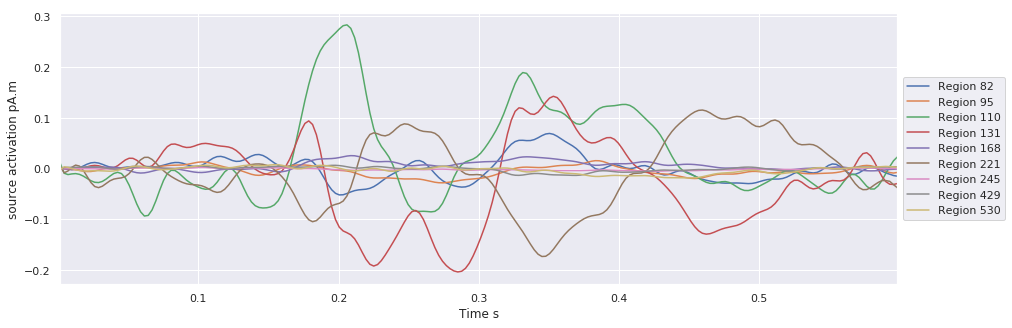

In [8]:
plt.figure(figsize=(15,5))
for i in range(cltp2.J.shape[1]):
    plt.plot(samples, cltp2.J[:-1, i]/1e-12, label='Region ' + str(cltp2.Active_set[i]));
plt.ylabel('source activation pA.m');
plt.xlabel('Time s');
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.xlim(samples[0], samples[-1]);

# Multivariate autoregressive model weights

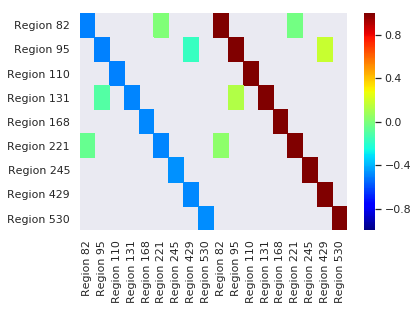

In [16]:
mask = np.abs(cltp2.MAR) < 0.01
reg_name_y = ['Region ' + str(cltp2.Active_set[i]) for i in range(len(cltp2.Active_set))]
reg_name_x = ['Region ' + str(cltp2.Active_set[i]) for i in range(len(cltp2.Active_set))]
reg_name_x += reg_name_x
sns.heatmap(cltp2.MAR, yticklabels= reg_name_y, xticklabels=reg_name_x, mask=mask, cmap='jet',
            vmin=-1, vmax=1);